<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01110946/blob/main/Actividad_7_Regresi%C3%B3n_lineal_polinomial_A01110946.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

# Maestría en Inteligencia Artificial Aplicada
## Ciencia y analítica de datos
## Actividad Semanal 7 -- Regresión lineal polinomial
#### Tecnológico de Monterrey
#### Prof. María De La Paz Rico

#### Tutor: Roberto Antonio Guevara González

#### Alumno: Fernando Maytorena Espinosa de los Monteros | A01110946

#### Martes 09 de noviembre de 2022

## **Ejercicio 1 - Regresión lineal**

Utiliza la base de datos de https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,  r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
530,4.537264,35.512017
395,4.121183,36.560335
515,4.490305,45.263989
729,5.264154,35.939491
419,4.200602,29.119848
185,3.264346,48.176167
973,7.169644,25.311833
638,4.969887,26.890247
928,6.409838,24.795743
984,7.584513,27.709089


In [ ]:
df.info

<bound method DataFrame.info of      Number of Units  Manufacturing Cost
0           1.000000           95.066056
1           1.185994           96.531750
2           1.191499           73.661311
3           1.204771           95.566843
4           1.298773           98.777013
..               ...                 ...
995         8.099710           23.855067
996         8.739752           27.536542
997         8.780888           25.973787
998         8.897700           25.138311
999        10.000000           21.547777

[1000 rows x 2 columns]>

In [ ]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

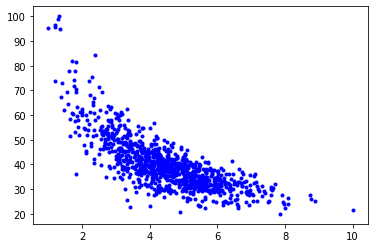

In [ ]:
# Revisamos la distribución de los datos
plt.plot(X,y,'b.')

#### **1. Divide los datos del costo de manufactura.**

In [ ]:
# Dividimos nuestra base de datos en conjunto de entrenamiento (90%) y conjunto de prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)


In [ ]:
# Revisamos la forma de la base de datos después de la partición
print('El conjunto de entrenamiento para las variables de entrada tiene una forma de:', X_train.shape)
print('El conjunto de entrenamiento para las variables de salida tiene una forma de:', X_test.shape)
print('El conjunto de prueba para las variables de entrada tiene una forma de:', y_train.shape)
print('El conjunto de prueba para las variables de salida tiene una forma de:', y_test.shape)

El conjunto de entrenamiento para las variables de entrada tiene una forma de: (900, 1)
El conjunto de entrenamiento para las variables de salida tiene una forma de: (100, 1)
El conjunto de prueba para las variables de entrada tiene una forma de: (900, 1)
El conjunto de prueba para las variables de salida tiene una forma de: (100, 1)


#### **2. Regresión Lineal** - Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

##### Modelo

In [ ]:
# Preparamos y ajustamos el modelo de regresión lineal
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

X_LR = X_train
y_LR = LR.predict(X_LR)

##### Ecuación

In [ ]:
# Ecuación del modelo de regresión lineal
print(f'y = {LR.coef_[0][0]}*X + {LR.intercept_[0]}')

y = -6.033572762971054*X + 67.03883293539208


La ecuación del modelo de regresión lineal queda de la siguiente forma:
$\hat{y} = -6.03X + 67.03$

##### Visualización

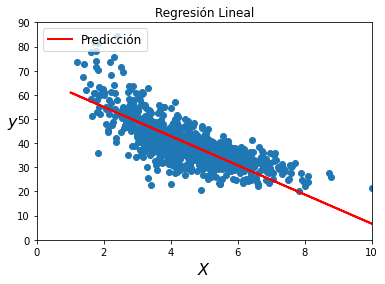

In [ ]:
# Visualizamos los datos utilizando una gráfica de dispersión
plt.scatter(X_train, y_train)
plt.plot(X_LR, y_LR, 'r-', linewidth=2, label='Predicción')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Lineal')
plt.axis([0, 10, 0, 90]);

##### Errores y r<sup>2</sup>

In [ ]:
# Creamos listas vacías para alojar los resultados de las´métricas MAE, RMSE y R2
MAE_list = []
RMSE_list = []
R2_list = []

# Calculamos el valor de los errores MAE, RMSE y R2
MAE_LR = mean_absolute_error(y_train, y_LR)
RMSE_LR = mean_squared_error(y_train, y_LR, squared=False)
R2_LR = r2_score(y_train, y_LR)

# Agregamos los resultados a nuestras listas vacías
MAE_list.append(MAE_LR) 
RMSE_list.append(RMSE_LR)
R2_list.append(R2_LR)

# Imprimimos los resultados de los errores
print('El Error Medio Absoluto (MAE) del modelo de regresión es:', MAE_LR)
print('La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es:', RMSE_LR)
print('El R2 score del modelo de regresión es:', R2_LR)

El Error Medio Absoluto (MAE) del modelo de regresión es: 4.9589799031460275
La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es: 6.978468118118778
El R2 score del modelo de regresión es: 0.571711162274217


#### **3. Regresión Polinomial** - Realiza la regresión polinomial: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

##### Modelo

In [ ]:
# Preparamos y ajustamos el modelo de regresión polinomial
PR = PolynomialFeatures(degree=2, include_bias=False)
PR_X_train = PR.fit_transform(X_train)
PRmodel = LinearRegression(fit_intercept=True)
PRmodel.fit(PR_X_train, y_train)

LinearRegression()

In [ ]:
# Continuamos con el conjunto de prueba, ajustamos los datos y revisamos su forma
PR_X_test = PR.fit_transform(X_test)
PR_y_predict = PRmodel.predict(PR_X_test)
print(PR_X_test.shape)
print(PR_y_predict.shape)

(100, 2)
(100, 1)


##### Ecuación

In [ ]:
#Ecuación del modelo
print(f'y = {PRmodel.coef_[0,1]}*X^2 {PRmodel.coef_[0,0]}*X + {PRmodel.intercept_[0]}')

y = 1.1885215375112932*X^2 -16.951471748619337*X + 89.97388061400437


La ecuación del modelo polinomial queda de la siguiente forma:

$\hat{y} =  1.18X^2 - 16.95X + 89.97$

##### Visualización

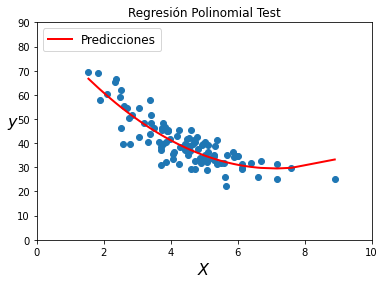

In [ ]:
#Ordenamos los datos (paso necesario para la visualización)
order = np.argsort(X_test.values.ravel())
order_X = X_test.values.ravel()[order] 
order_y = y_test.values.ravel()[order]
order_PR_y_predict = PR_y_predict[order]

# Visualizamos los datos utilizando una gráfica de dispersión
plt.scatter(X_test, y_test)
plt.plot(order_X, order_PR_y_predict, 'r-', linewidth=2, label='Predicciones')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Polinomial Test')
plt.axis([0, 10, 0, 90]);

##### Errores y r<sup>2</sup>

In [ ]:
# Creamos listas vacías para alojar los resultados de las´métricas MAE, RMSE y R2
#MAE_list = []
#RMSE_list = []
#R2_list = []

# Calculamos el valor de los errores MAE, RMSE y R2
MAE_PR = mean_absolute_error(y_test, PR_y_predict)
RMSE_PR = mean_squared_error(y_test, PR_y_predict, squared=False)
R2_PR = r2_score(y_test, PR_y_predict)

# Agregamos los resultados a nuestras listas vacías
MAE_list.append(MAE_PR) 
RMSE_list.append(RMSE_PR)
R2_list.append(R2_PR)

# Imprimimos los resultados de los errores
print('El Error Medio Absoluto (MAE) del modelo de regresión es:', MAE_PR)
print('La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es:', RMSE_PR)
print('El R2 score del modelo de regresión es:', R2_PR)

El Error Medio Absoluto (MAE) del modelo de regresión es: 4.070921827959767
La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es: 5.101935770152972
El R2 score del modelo de regresión es: 0.7345357864097419


#### **4a. Regresión con Ridge** - Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### Modelo

In [ ]:
# Preparamos y ajustamos el modelo de regresión con Ridge
Ridgemodel = Ridge(alpha=5.0, fit_intercept=True)
Ridgemodel.fit(X_train, y_train)

X_ridge = X_test
y_ridge = Ridgemodel.predict(X_ridge)

##### Ecuación

In [ ]:
#Ecuación del modelo
print(f'y = {Ridgemodel.coef_[0,0]}*X + {Ridgemodel.intercept_[0]}')

y = -6.014859823996596*X + 66.95504593256987


La ecuación del modelo de regresión Ridge queda de la siguiente forma:

$\hat{y} =  -6.01X + 66.95$

##### Visualización

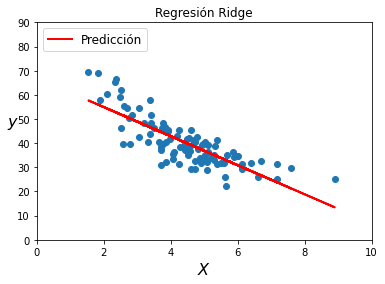

In [ ]:
# Visualizamos los datos utilizando una gráfica de dispersión
plt.scatter(X_test, y_test)
plt.plot(X_ridge, y_ridge, 'r-', linewidth=2, label='Predicción')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Ridge')
plt.axis([0, 10, 0, 90]);

##### Erroresy r<sup>2</sup>

In [ ]:
# Creamos listas vacías para alojar los resultados de las´métricas MAE, RMSE y R2
#MAE_list = []
#RMSE_list = []
#R2_list = []

# Calculamos el valor de los errores MAE, RMSE y R2
MAE_Ridge = mean_absolute_error(y_test, y_ridge)
RMSE_Ridge = mean_squared_error(y_test, y_ridge, squared=False)
R2_Ridge = r2_score(y_test, y_ridge)

# Agregamos los resultados a nuestras listas vacías
MAE_list.append(MAE_Ridge) 
RMSE_list.append(RMSE_Ridge)
R2_list.append(R2_Ridge)

# Imprimimos los resultados de los errores
print('El Error Medio Absoluto (MAE) del modelo de regresión es:', MAE_Ridge)
print('La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es:', RMSE_Ridge)
print('El R2 score del modelo de regresión es:', R2_Ridge)

El Error Medio Absoluto (MAE) del modelo de regresión es: 4.582378313036828
La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es: 5.820732664728692
El R2 score del modelo de regresión es: 0.6544655791836619


#### **4b. Regresión con Lasso** - Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
# Preparamos y ajustamos el modelo de regresión con Lasso
Lassomodel = Lasso(alpha=4.5, fit_intercept=True)
Lassomodel.fit(X_train, y_train)
X_Lasso = X_test
y_Lasso = Lassomodel.predict(X_Lasso)

##### Ecuación

In [ ]:
#Ecuación del modelo
print(f'y = {Lassomodel.coef_[0]}*X + {Lassomodel.intercept_[0]}')

y = -3.513567141420818*X + 55.7555321982398


La ecuación del modelo de regresión Lasso queda de la siguiente forma:

$\hat{y} =  -3.51X + 55.75$

##### Visualización

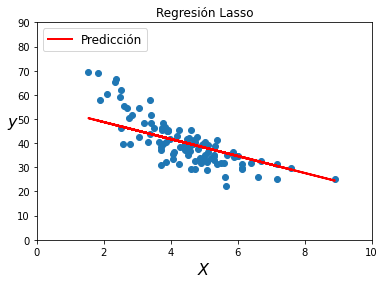

In [ ]:
#Gráfico de dispersión (Scatter) para ver la distribución de los datos de prueba
plt.scatter(X_test, y_test)
plt.plot(X_Lasso, y_Lasso, 'r-', linewidth=2, label='Predicción')
plt.xlabel("$X$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=12);
plt.title(label = 'Regresión Lasso')
plt.axis([0, 10, 0, 90]);

##### Errores y r<sup>2</sup>

In [ ]:
# Creamos listas vacías para alojar los resultados de las´métricas MAE, RMSE y R2
#MAE_list = []
#RMSE_list = []
#R2_list = []

# Calculamos el valor de los errores MAE, RMSE y R2
MAE_Lasso = mean_absolute_error(y_test, y_Lasso)
RMSE_Lasso = mean_squared_error(y_test, y_Lasso, squared=False)
R2_Lasso = r2_score(y_test, y_Lasso)

# Agregamos los resultados a nuestras listas vacías
MAE_list.append(MAE_Lasso) 
RMSE_list.append(RMSE_Lasso)
R2_list.append(R2_Lasso)

# Imprimimos los resultados de los errores
print('El Error Medio Absoluto (MAE) del modelo de regresión es:', MAE_Lasso)
print('La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es:', RMSE_Lasso)
print('El R2 score del modelo de regresión es:', R2_Lasso)

El Error Medio Absoluto (MAE) del modelo de regresión es: 5.03960379111882
La Raíz del Error Medio Cuatrático (RMSE) del modelo de regresión es: 6.714133530059934
El R2 score del modelo de regresión es: 0.5402561184408167


#### **5. Grafica MAE y R<sup>2</sup>**

In [ ]:
# Primero, imprimimos las listas con resultados de los errores y r2 de los cuatro modelos
print(MAE_list)
print(RMSE_list)
print(R2_list)

[4.9589799031460275, 4.070921827959767, 4.582378313036828, 5.03960379111882]
[6.978468118118778, 5.101935770152972, 5.820732664728692, 6.714133530059934]
[0.571711162274217, 0.7345357864097419, 0.6544655791836619, 0.5402561184408167]


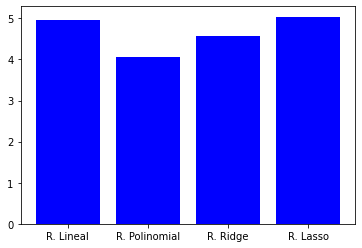

In [ ]:
# Graficamos el Error Medio Absoluto de los cuatro modelos
plt.bar(['R. Lineal', 'R. Polinomial', 'R. Ridge', 'R. Lasso'], MAE_list, color='b')
plt.show()

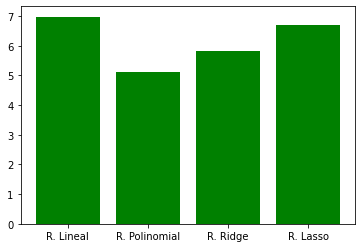

In [ ]:
# Graficamos la Raíz del Error Medio Cuadrático de los cuatro modelos
plt.bar(['R. Lineal', 'R. Polinomial', 'R. Ridge', 'R. Lasso'], RMSE_list, color='g')
plt.show()

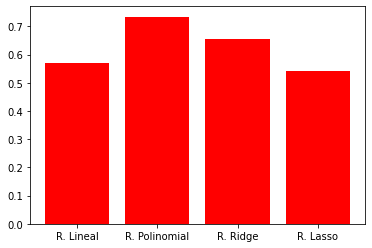

In [ ]:
# Graficamos el score de R^2 de los cuatro modelos
plt.bar(['R. Lineal', 'R. Polinomial', 'R. Ridge', 'R. Lasso'], R2_list, color='r')
plt.show()

#### **6. Conclusiones:** Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Para responder las preguntas sobre qué modelo se desempeña mejor, primero debemos entender el objetivo de las métricas de desempeño que utilizamos para evaluar los diferentes modelos de regresión lineal que hemos utilizado.

>El Error Absoluto Medio (**MAE**) nos muestra el promedio de la diferencia entre los valores reales y predichos en el conjunto de datos, en números absolutos para facilitar su interpretación. Dicho de otra manera, mide el promedio de los residuos en el conjunto de datos que analiza el modelo de regresión. Mientras más bajo sea el Error Absoluto Medio, mejor es el desempeño del modelo que estamos evaluando.

>La Raíz del Error Cuadrático Medio (**RMSE**) mide la desviación estándar de los residuos en el conjunto de datos que analiza el modelo de regresión. Mientras más bajo sea el Error Absoluto Medio, mejor es el desempeño del modelo que estamos evaluando.

>El score de la R-cuadrada (**R<sup>2</sup>**) representa la proporción de la varianza en la variable dependiente (o de salida) que es explicada por el modelo de regresión lineal. El score de la R-cuadrada siempre será menor a uno; y, a diferencia de MAE y RMSE, mientras mayor sea el score de la R-cuadrada, mejor es el desempeño del modelo que estamos evaluando.

Una vez que tenemos claro cómo interpretar las métricas de desempeño, revisamos que el modelo con el menor Error Absoluto Medio (**MAE**) es el modelo de regresión polinomial, con un error de **4.07**, y a su vez, este modelo también presenta el la menor Raíz del Error Cuadrático Medio (**RMSE**) con un error de **5.10**. Por último, el mismo modelo de regresión polinomial nos muestra el mayor score de la R-cuadrada, con un score de **0.73**. Por lo tanto, después de analizar las métricas de desempeño, es fácil concluir que el modelo óptimo para la empresa de manufactura sería el de **regresión polinomial**.

Decidí partir la base de datos en un conjunto de entrenamiento de **90%**, y un conjunto de prueba de **10%**, lo anterior con la intención de tener el mayor número de datos en el conjunto de entrenamiento para evitar tenerun modelo subentrenado, entendiendo que la cantidad de registros de la base de datos no es tan elevada.

El desempeño del modelo es relativamente bueno considerando que no se llevó a cabo un proceso de transformación, y de búsqueda de los mejores hiperparámetros. Por ejemplo, en el modelo de regresión polinomial, corrimos el modelo con grado 2, sin embargo, podríamos buscar mejorar el desempeño del modelo corriendo el modelo con un grado distinto. En conclusión, el modelo es bueno, pero tiene margen de mejorar.

> EL método que mejores resultados está presentando es el de **Regresión Polinomial**. Debido a que este tiene un índice más alto de R2 **(0.7586)**, esto se ve reflejado en el gráfico, donde podemos visualizar cómo los datos presentan una ligera curva, la ventaja de utilizar la Regresión Polinomial es que va aplicando estas curvas a nuestra  predicción, pudiendo obtener valores más similares entre la predicción y el test. Por otro lado, el MAE, no nos indica mas que el punto donde se concentra una mayor cantidad de valores.

> Usé un porcentaje de entrenaiento de **80%** y de prueba de **20%**, busqué distribuir de esta forma los datos para tener un alto número de entrenamiento y poder evaluar con una considerable muestra de los datos.

>Tenemos dos errores. Los cuales nos representan que el mayor conjunto de datos se presenta en los valores cercanos al 122015, esto con base a los valores presentados en nuestra única feature representada con la variable X. Ambos son errores similares, es donde se concentra la mayor cantidad de muestras.
* Error medio Absoluto (MAE): 122015.80006144893
* Root Mean Squared Error (RMSE): 181470.06574727758
* r2_score 0.7586232413126757

>No es malo, ni bueno. Simplemente nos presenta un panorama de dónde estamos teniendo una mayor concentración de datos, por lo tanto, considerar esta parte para el modelo y para los distintos conjuntos de datos que se llegarían a testear.

---